In [17]:
import pandas as pd # untuk analisa dataframe
import numpy as np # untuk perhitungan statistik 
import matplotlib.pyplot as plt # untuk visualisasi
import seaborn as sns # untuk visualisasi

In [18]:
# Import Data
data_cleaning = pd.read_csv('final_shop_6modata.csv')
data_cleaning.info()
data_cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ad Group     190 non-null    object 
 1   Month        190 non-null    object 
 2   Impressions  190 non-null    int64  
 3   Clicks       190 non-null    int64  
 4   CTR          190 non-null    float64
 5   Conversions  190 non-null    int64  
 6   Conv Rate    190 non-null    float64
 7   Cost         190 non-null    int64  
 8   CPC          190 non-null    float64
 9   Revenue      190 non-null    int64  
 10  Sale Amount  190 non-null    float64
 11  P&L          190 non-null    float64
dtypes: float64(5), int64(5), object(2)
memory usage: 17.9+ KB


,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sale Amount,P&L
0,Shop - 1:1 - Desk - [shop coupon code],July,16038,6504,0.41,1166,0.10,6669,1.03,6402,136770.05,-267.086
1,Shop - 1:1 - Desk - [shop coupon],July,36462,14367,0.39,2188,0.09,13746,0.96,13262,283215.21,-483.951
2,Shop - 1:1 - Desk - [shop discount code],July,3635,1458,0.40,248,0.09,1606,1.10,1723,39165.46,117.136
3,Shop - 1:1 - Desk - [shop promo code],July,26185,10418,0.40,2294,0.12,13278,1.27,13042,284823.48,-235.921
4,Shop - 1:1 - Desk - [shop promo],July,808,282,0.35,61,0.15,391,1.39,337,7717.77,-53.604
...,...,...,...,...,...,...,...,...,...,...,...,...
185,Shop - Exact - Desk - Black Friday/Cyber Monday,November,257,24,0.09,7,0.28,3,0.14,45,898.80,41.946
186,Shop - 1:1 - Desk - [shop discount code],November,7254,2725,0.38,512,0.11,3182,1.17,3227,66672.29,45.468
187,Shop - Exact - Desk - Coupon Code,November,18526,5553,0.30,919,0.10,5982,1.08,6047,129556.90,64.552
188,Shop - Exact - Mob - Black Friday/Cyber Monday,November,3662,266,0.07,24,0.09,44,0.17,160,3268.63,115.963


# Data Cleaning

In [19]:
# check data unique
data_cleaning['Ad Group'].unique()

array(['Shop - 1:1 - Desk - [shop coupon code]',
       'Shop - 1:1 - Desk - [shop coupon]',
       'Shop - 1:1 - Desk - [shop discount code]',
       'Shop - 1:1 - Desk - [shop promo code]',
       'Shop - 1:1 - Desk - [shop promo]',
       'Shop - 1:1 - Mob - [shop coupon code]',
       'Shop - 1:1 - Mob - [shop coupon]',
       'Shop - 1:1 - Mob - [shop discount code]',
       'Shop - 1:1 - Mob - [shop promo code]',
       'Shop - 1:1 - Mob - [shop promo]',
       'Shop - Exact - Desk - Competitor',
       'Shop - Exact - Desk - Coupon Code',
       'Shop - Exact - Desk - Discount Code',
       'Shop - Exact - Desk - Free Shipping',
       'Shop - Exact - Desk - Offer', 'Shop - Exact - Desk - Promo Code',
       'Shop - Exact - Desk - Sale', 'Shop - Exact - Mob - Competitor',
       'Shop - Exact - Mob - Coupon Code',
       'Shop - Exact - Mob - Discount Code',
       'Shop - Exact - Mob - Free Shipping', 'Shop - Exact - Mob - Offer',
       'Shop - Exact - Mob - Promo Code', 'Shop

In [20]:
# Make new Column
data_cleaning["Device"] = None
data_cleaning["Device"][data_cleaning["Ad Group"].str.contains("Desk")] = "Desktop" # change values if fill Desk
data_cleaning["Device"][data_cleaning["Ad Group"].str.contains("Mob")] = "Mobile" # change values if fill Mob

C:\Users\user\AppData\Local\Temp\ipykernel_15128\2122810350.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaning["Device"][data_cleaning["Ad Group"].str.contains("Desk")] = "Desktop"
C:\Users\user\AppData\Local\Temp\ipykernel_15128\2122810350.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaning["Device"][data_cleaning["Ad Group"].str.contains("Mob")] = "Mobile"


In [21]:
# Change values
data_cleaning["Ad Group"][data_cleaning["Ad Group"].str.contains("coupon")] = "Coupon" # change values if fill coupon
data_cleaning["Ad Group"][data_cleaning["Ad Group"].str.contains("Coupon")] = "Coupon" # change values if fill Coupon
data_cleaning["Ad Group"][data_cleaning["Ad Group"].str.contains("promo")] = "Promo" # change values if fill Promo
data_cleaning["Ad Group"][data_cleaning["Ad Group"].str.contains("discount ")] = "Discount" # change values if fill discount
data_cleaning["Ad Group"][data_cleaning["Ad Group"].str.contains("Discount ")] = "Discount" # change values if fill Discount
data_cleaning["Ad Group"][data_cleaning["Ad Group"].str.contains("Free Shipping")] = "Free Shipping" # change values if Free Shipping
data_cleaning["Ad Group"][data_cleaning["Ad Group"].str.contains("Offer")] = "Offer" # change values if fill Offer
data_cleaning["Ad Group"][data_cleaning["Ad Group"].str.contains("Promo Code")] = "Promo" # change values if fill Promo Code
data_cleaning["Ad Group"][data_cleaning["Ad Group"].str.contains("Competitor")] = "Competitor" # change values if fill Competitor
data_cleaning["Ad Group"][data_cleaning["Ad Group"].str.contains("Sale")] = "Sale" # change values if fill Sale
data_cleaning["Ad Group"][data_cleaning["Ad Group"].str.contains("Black Friday/Cyber Monday")] = "Black Friday/Cyber Monday" # change values if fill Black Friday/Cyber Monday

C:\Users\user\AppData\Local\Temp\ipykernel_15128\1450661391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaning["Ad Group"][data_cleaning["Ad Group"].str.contains("coupon")] = "Coupon"
C:\Users\user\AppData\Local\Temp\ipykernel_15128\1450661391.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaning["Ad Group"][data_cleaning["Ad Group"].str.contains("Coupon")] = "Coupon"
C:\Users\user\AppData\Local\Temp\ipykernel_15128\1450661391.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


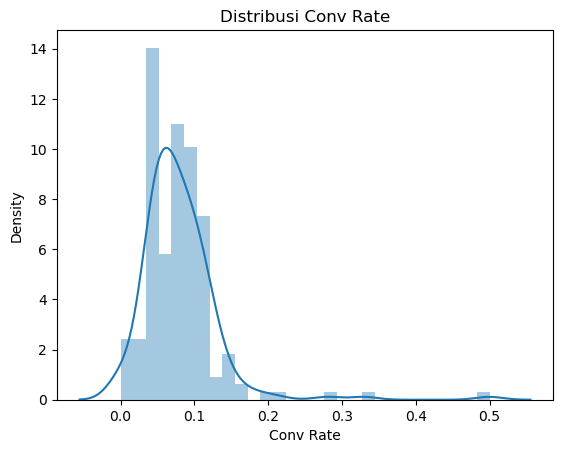

In [22]:
# see Distribution
sns.distplot(data_cleaning['Conv Rate'])
plt.title("Distribusi Conv Rate")
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


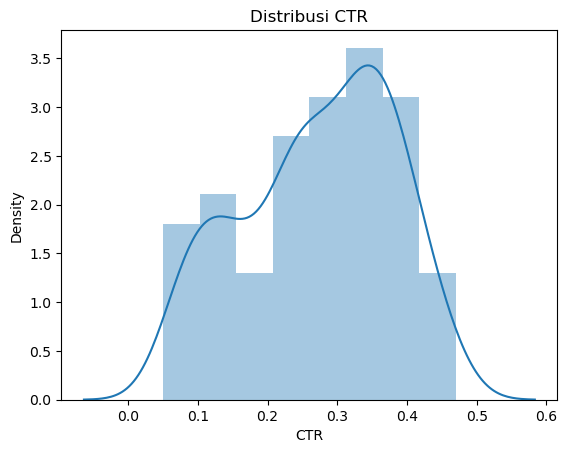

In [23]:
# see Distribution
sns.distplot(data_cleaning['CTR'])
plt.title("Distribusi CTR")
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


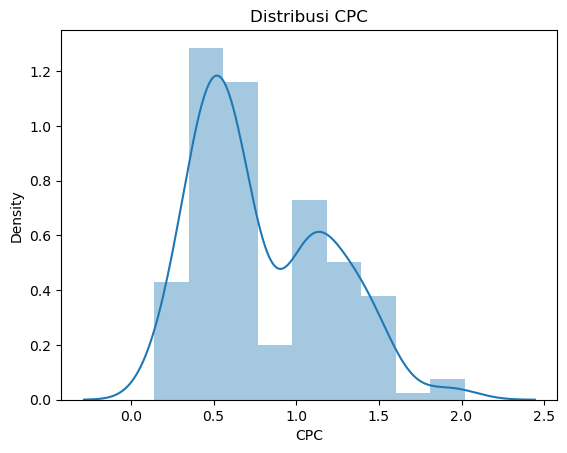

In [26]:
# see Distribution
sns.distplot(data_cleaning['CPC'])
plt.title("Distribusi CPC")
plt.show()

<AxesSubplot:>

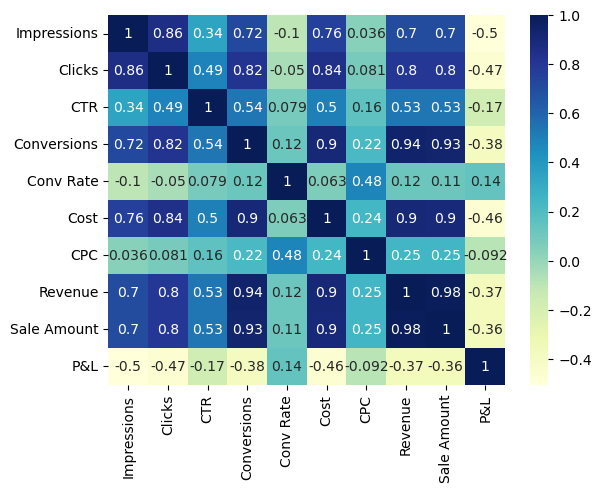

In [27]:
# check correlation with heatmap
sns.heatmap(data_cleaning.corr("kendall"), cmap="YlGnBu", annot=True)

In [25]:
# save data
data_cleaning.to_csv('Business_project.csv', index=False)